In [12]:
'''MOTIFENUMERATION(Dna, k, d)
A brute force algorithm for motif finding'''

def HammingDistance(p,q):
    HamDi=int(0)
    for i in range(len(p)):
        if p[i]==q[i]:
            continue
        else:
            HamDi+=+1
    return(HamDi)
#--
def Neighbors(Pattern, d):
    if d == 0:
        Neighborhood =(str(Pattern))
        return Neighborhood
    if len(Pattern) == 1: 
        Neighborhood=['A','C','G','T']
        return Neighborhood
    nucl=['A','C','G','T']
    Neighborhood=list()
    SuffixNeighbors = Neighbors((Pattern[1:]), d)
    for Text in SuffixNeighbors:
        if HammingDistance((Pattern[1:]), Text) < d:
            for n in nucl:
                Neighborhood.append(str(n + Text)) 
        else:
            Neighborhood.append(str(Pattern[0]+ Text))
    return Neighborhood

#--

def MOTIFENUMERATION(Dna, k, d):
    i=1
    p=list()
    while i<len(lines):
        list_i=list()
        for n in range(len(lines[i])-k+1):
            Neigh=Neighbors(lines[i][n:n+k],d)
            for word in Neigh:
                list_i.append(word)
        p.append(list_i)
        i=i+1  
    return(set.intersection(*map(set, p)))
#-----------------------------------------------------------------------


print (' '.join(MOTIFENUMERATION(Dna, k, d)))

NameError: name 'Dna' is not defined

In [13]:
'''d(Pattern, Dna)
the sum of distances between Pattern and all strings in Dna'''
def HammingDistance(p,q):
    HamDi=int(0)
    for i in range(len(p)):
        if p[i]==q[i]:
            continue
        else:
            HamDi+=+1
    return(HamDi)

#--
def d(Pattern, Dna):
    score=0
    k=len(Pattern)
    for i in range(0,len(Dna)):
        Hamdist={}
        minDist={}
        seq=Dna[i]
        for n in range(0,len(seq)-(k-1)):
            Hamdist[seq[n:n+k]]=HammingDistance(Pattern,seq[n:n+k])
        minimum=int(min(Hamdist.values()))
        score+=minimum
    return(score)
#------------------------------------------------

d('AAA',('ATAGGCC','ATAAGGC','TTAGGCC'))

4

In [26]:
'''MEDIANSTRING(Dna, k)
A k-mer Pattern that minimizes d(Pattern, Dna) among all k-mers Pattern.'''
#--
def HammingDistance(p,q):
    HamDi=int(0)
    for i in range(len(p)):
        if p[i]==q[i]:
            continue
        else:
            HamDi+=+1
    return(HamDi)
#--
def NumberToPattern(Number, k):
    d={'A':0,'C':1,'G':2,'T':3}
    pattern=[]
    if k==1:
        #return d.keys()[d.values().index(Number)]
        return (list(d.keys())[list(d.values()).index(int(Number))])
    prefixIndex = Number//4
    r = Number%4
    PrefixPattern = NumberToPattern(prefixIndex, (k-1))
    symbol = (list(d.keys())[list(d.values()).index(r)])
    return (PrefixPattern+symbol)

#--
def d(Pattern, Dna):
    score=0
    k=len(Pattern)
    for i in range(0,len(Dna)):
        Hamdist={}
        minDist={}
        seq=Dna[i]
        for n in range(0,len(seq)-(k-1)):
            Hamdist[seq[n:n+k]]=HammingDistance(Pattern,seq[n:n+k])
        minimum=int(min(Hamdist.values()))
        score+=minimum
    return(score)

#--
def MEDIANSTRING(Dna, k):
    distance= float('inf')
    kmer_pattern=list()
    Median=list()
    for n in range(4**k):
        kmer_pattern.append(NumberToPattern(n, k))

    for Pattern in kmer_pattern:
        #if distance > d(Pattern, Dna):
        if 0 == d(Pattern, Dna):    
            
            print distance
            Median.append(Pattern)
    return(Median)

#--------------------------------------------------
String=(['CTCGATGAGTAGGAAAGTAGTTTCACTGGGCGAACCACCCCGGCGCTAATCCTAGTGCCC','GCAATCCTACCCGAGGCCACATATCAGTAGGAACTAGAACCACCACGGGTGGCTAGTTTC','GGTGTTGAACCACGGGGTTAGTTTCATCTATTGTAGGAATCGGCTTCAAATCCTACACAG'])
print(MEDIANSTRING(String,7))
#print MEDIANSTRING(['AGGTTTCTGGTTGTACACTACTCTTAACAGAGCATTAGTAGA', 'GCAACACAATGTAATCGGCCATAGAGGTTTAAATCTCTCCCT', 'ACTGGTGGATAATAAACCCTGTATACTAACTTTTGCCGGTTT', 'TATTATCGGTTTAGTCGATACATTTCTACCAGGAAGAGATAG', 'TGTCATAGGTAGGCTCGCGGGTTTAGCTCTATATATTCGGCC', 'TAGTAAACATCGGTCGCTTGGTTTAATATATCAAGTGCTACC', 'CTTTTTTTTGGCCTTTCAATTCCTCGGTTTCGTTCGCGGCGT', 'CCCGCTAGGTTTAGTAGCCTTTATGAAGGCTCCCATCACGAC', 'CGTAGCTTGCAATGTTGCCGGTTTGGGTGCAACAGAACTAGA', 'CAGTTTCGGCATAGAGACGTTAGATTGGTTGGGTTTTACGTC'], 6)

inf
inf
inf
inf
['AATCCTA', 'GAACCAC', 'GTAGGAA', 'TAGTTTC']


In [14]:
'''Profile_most(Text,k,Profile)

Profile-most Probable k-mer:
a k-mer that was most likely to have been generated by Profile among all k-mers in Text'''
from numpy import *

#--

def PatternToNumber(seq):
    d={'A':0,'C':1,'G':2,'T':3}
    number=0
    revseq=seq[::-1]
    for i in range(len(revseq)):
        number += d[revseq[i]]*(4**i)
    return(number)

#--


def Profile_most(Text,k,Profile):
    max_score=0
    most_probable_kmer=Text[0:0+k]
    for n in range(0,len(Text)-(k-1)):
        kmer=Text[n:n+k]
        score=1
        for i in range(0,len(kmer)):
            probaN=Profile[PatternToNumber(kmer[i])][i]
            return probaN
            score *= probaN
            return score
        if score>max_score:
            max_score=score
            most_probable_kmer=kmer

    return(most_probable_kmer)

#---------------------
from numpy import *
Text='TGCCCGAGCTATCTTATGCGCATCGCATGCGGACCCTTCCCTAGGCTTGTCGCAAGCCATTATCCTGGGCGCTAGTTGCGCGAGTATTGTCAGACCTGATGACGCTGTAAGCTAGCGTGTTCAGCGGCGCGCAATGAGCGGTTTAGATCACAGAATCCTTTGGCGTATTCCTATCCGTTACATCACCTTCCTCACCCCTA'
k=6
profile=array([[ 0.364,  0.182,  0.121,  0.333],
       [ 0.333,  0.182,  0.303,  0.182],
       [ 0.303,  0.212,  0.182,  0.303],
       [ 0.212,  0.303,  0.273,  0.212],
       [ 0.121,  0.182,  0.333,  0.364],
       [ 0.242,  0.303,  0.303,  0.152]])

Profile=array(profile.transpose())
#print Profile
print Profile_most(Text,k,Profile)


0.333


In [15]:
'''MakeProfile(Motif_list)
Make profile matrix from a list of motifs'''

#V1: Without pseudo counts, 0 probability possible
from numpy import *
import numpy as np
def MakeProfile(Motif_list):
    k=len(Motif_list[0])
    matrix_occ = np.zeros((4,k))
    for i in range(len(Motif_list)):
        for n in range(len(Motif_list[i])):
            matrix_occ[(PatternToNumber(Motif_list[i][n])),n]+=1   
    Profile_matrix= matrix_occ / matrix_occ.sum(axis=0, dtype='float')       
    return Profile_matrix  
#-----------------------------------
Motif_list=list()
Motif_list.append('GGC')
Motif_list.append('AAG')
Profile= (MakeProfile(Motif_list))
print Profile

####################################################################################################
##V2: With pseudo counts, get rid of 0 probability


from numpy import *
import numpy as np
def MakeProfile(Motif_list):
    k=len(Motif_list[0])
    matrix_occ = np.zeros((4,k))
    matrix_occ +=1
    for i in range(len(Motif_list)):
        for n in range(len(Motif_list[i])):
            matrix_occ[(PatternToNumber(Motif_list[i][n])),n]+=1   
    Profile_matrix= matrix_occ / matrix_occ.sum(axis=0, dtype='float')
    #return matrix_occ.sum(axis=0, dtype='float')
    return Profile_matrix  
#-----------------------------------
Motif_list=list()
Motif_list.append('GGC')
Motif_list.append('AAG')
Profile= (MakeProfile(Motif_list))

print Profile

[[ 0.5  0.5  0. ]
 [ 0.   0.   0.5]
 [ 0.5  0.5  0.5]
 [ 0.   0.   0. ]]
[[ 0.33333333  0.33333333  0.16666667]
 [ 0.16666667  0.16666667  0.33333333]
 [ 0.33333333  0.33333333  0.33333333]
 [ 0.16666667  0.16666667  0.16666667]]


In [21]:
'''Consensus(Profile)

output consensus sequence from a profile matrix'''
import numpy as np
def Consensus(Profile):
    maxarg= list(Profile.argmax(0))
    Cons=''
    for posi in maxarg:
        Cons+=NumberToPattern(int(posi), 1)
    return Cons
#----------------------------------
Motif_list=list()
Motif_list.append('GGC')
Motif_list.append('AAG')
#Profile= (MakeProfile(Motif_list))
Profile=[[0.4  0.3  0.0  0.1  0.0  0.9],[0.2  0.3  0.0  0.4  0.0  0.1],[0.1  0.3  1.0  0.1  0.5  0.0],[0.3  0.1  0.0  0.4  0.5  0.0]] 
print Profile
print Consensus(Profile)

SyntaxError: invalid syntax (<ipython-input-21-3c323e99d79f>, line 16)

In [2]:
'''GREEDYMOTIFSEARCH(Dna,k,t)
with pseudocount
'''

from numpy import *
import time
import numpy as np
start_time = time.time()
#--
def HammingDistance(p,q):
    HamDi=int(0)
    for i in range(len(p)):
        if p[i]==q[i]:
            continue
        else:
            HamDi+=+1
    return(HamDi)

#--
def NumberToPattern(Number, k):
    d={'A':0,'C':1,'G':2,'T':3}
    pattern=[]
    if k==1:
        #return d.keys()[d.values().index(Number)]
        return (list(d.keys())[list(d.values()).index(int(Number))])
    prefixIndex = Number//4
    r = Number%4
    PrefixPattern = NumberToPattern(prefixIndex, (k-1))
    symbol = (list(d.keys())[list(d.values()).index(r)])
    return (PrefixPattern+symbol)
#--
def PatternToNumber(Pattern):
    d={'A':0,'C':1,'G':2,'T':3}
    if Pattern == '':
        return 0
    symbol = Pattern[-1]
    Pattern= Pattern[:-1]
    return(4 * PatternToNumber(Pattern) + d[symbol])
#--

def MakeProfile(Motif_list):
    '''with pseudocount'''
    k=len(Motif_list[0])
    matrix_occ = np.zeros((4,k))
    matrix_occ +=1
    for i in range(len(Motif_list)):
        for n in range(len(Motif_list[i])):
            matrix_occ[(PatternToNumber(Motif_list[i][n])),n]+=1   
    Profile_matrix= matrix_occ / matrix_occ.sum(axis=0, dtype='float')
    return Profile_matrix 

def MakeProfile(Motif_list):
    '''without pseudocount'''
    k=len(Motif_list[0])
    matrix_occ = np.zeros((4,k))
    for i in range(len(Motif_list)):
        for n in range(len(Motif_list[i])):
            matrix_occ[(PatternToNumber(Motif_list[i][n])),n]+=1   
    Profile_matrix= matrix_occ / matrix_occ.sum(axis=0, dtype='float')       
    return Profile_matrix  
#--
def Profile_most(Text,k,Profile):
    max_score=0
    most_probable_kmer=Text[0:0+k]
    for n in range(0,len(Text)-(k-1)):
        kmer=Text[n:n+k]
        score=1
        for i in range(0,len(kmer)):
            probaN=Profile[PatternToNumber(kmer[i])][i]
            score *= probaN
        if score>max_score:
            max_score=score
            most_probable_kmer=kmer
        else:
            continue
    return(most_probable_kmer)
#--
def Consensus(Profile):
    maxarg= list(Profile.argmax(0))
    Cons=''
    for posi in maxarg:
        Cons+=NumberToPattern(int(posi), 1)
    return Cons
#--
def d(Pattern, Dna):
    score=0
    k=len(Pattern)
    for i in range(0,len(Dna)):
        Hamdist={}
        minDist={}
        seq=Dna[i]
        for n in range(0,len(seq)-(k-1)):
            Hamdist[seq[n:n+k]]=HammingDistance(Pattern,seq[n:n+k])
        minimum=int(min(Hamdist.values()))
        score+=minimum
    return(score)
#--
def GREEDYMOTIFSEARCH(Dna,k,t):
    #starting conditions:
    BestMotifs_list=list()
    for string in range(len(Dna)):
        BestMotifs_list.append(Dna[string][0:0+k])

    #list all kmers in first string
    kmer_1st_string=list()
    for n in range(len(Dna[0])-(k-1)):
        Motif=Dna[0][n:n+k]
        kmer_1st_string.append(Motif)
    #-     
    for motif in kmer_1st_string:
        Motif_list=list()    
        Motif_list.append(motif)
        for i in range(1,len(Dna)):
            Text=Dna[i]
            Profile=array(MakeProfile(Motif_list))
            new_motif=Profile_most(Text,k,Profile) 
            Motif_list.append(new_motif)
        Motif_score= d(Consensus(MakeProfile(Motif_list)), Motif_list)
        if Motif_score < d(Consensus(MakeProfile(BestMotifs_list)), BestMotifs_list):
            BestMotifs_list=Motif_list
    return(BestMotifs_list)

#---------------------------------------------------------------------
f = open('/Users/juniper_admin/Desktop/dataset_161_5.txt','r')
lines=f.read().splitlines()
f.close()

k=int(lines[0].split(" ")[0])
t=int(lines[0].split(" ")[1])
N=int(lines[0].split(" ")[2])
Dna=lines[1:]


print('\n'.join(GREEDYMOTIFSEARCH(Dna,k,t)))
print ('The script took '+str(time.time()-start_time)+' s')

KeyboardInterrupt: 

In [29]:
def Pr(kmer,Profile):
    score=1
    for i in range(0,len(kmer)):
        probaN=Profile[PatternToNumber(kmer[i])][i]
        score *= probaN
    return score

from numpy import *
#kmer='TGCCCG'
Profile=array([[ 0.364,0.333,0.303,0.212,0.121,0.242],
 [0.182,0.182,0.212,0.303,0.182,0.303],
 [ 0.121,0.303,0.182,0.273,0.333,0.303],
 [ 0.333,0.182 ,0.303 ,0.212,0.364 ,0.152]])
profile= array([[0.4,  0.3,  0.0,  0.1,  0.0,  0.9],
[0.2,  0.3,  0.0 , 0.4  ,0.0 , 0.1],
[0.1 , 0.3 , 1.0 , 0.1  ,0.5 , 0.0],
[0.3 , 0.1 , 0.0 , 0.4,  0.5 , 0.0]])
#Profile=array(profile.transpose())
#print Profile
kmer='TCGGTA'
#print(Pr(kmer,Profile))
print(Pr(kmer,profile))


0.00405


[0.16666666666666666, 0.3333333333333333, 0.4999999999999999]
[2, 1, 2, 1, 2, 1, 0, 1, 1, 1, 1, 2, 0, 1, 1, 2, 1, 1, 1, 2, 0, 2, 1, 0, 0, 1, 1, 1, 2, 1, 1, 0, 2, 2, 0, 1, 2, 0, 0, 0, 1, 0, 1, 2, 2, 1, 2, 0, 2, 2, 2, 1, 2, 2, 0, 1, 0, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 1, 0, 0, 1, 0, 1, 2, 0, 1, 0, 2, 2, 2, 1, 2, 2, 2, 1, 2, 0, 2, 2, 0, 2, 0, 2]


(array([ 24.,   0.,   0.,   0.,   0.,  32.,   0.,   0.,   0.,  44.]),
 array([ 0. ,  0.2,  0.4,  0.6,  0.8,  1. ,  1.2,  1.4,  1.6,  1.8,  2. ]),
 <a list of 10 Patch objects>)

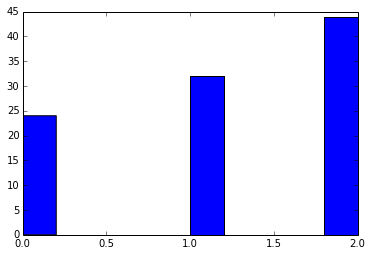

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
from __future__ import division
import numpy as np
kmerpr=[0.1, 0.2, 0.3]
prarray=[v/sum(kmerpr) for v in kmerpr]

print prarray
x=0
liste=list()
while x <100:
    i = np.random.choice( len(array), p=ar2 )
    liste.append(i)    
    x+=1
print liste
plt.hist(liste)


In [ ]:
'''FASTER GREEDYMOTIFSEARCH(Dna,k,t)
with pseudocount
'''

from numpy import *
import time
import numpy as np
start_time = time.time()
#--
def HammingDistance(p,q):
    HamDi=int(0)
    for i in range(len(p)):
        if p[i]==q[i]:
            continue
        else:
            HamDi+=+1
    return(HamDi)

#--
def NumberToPattern(Number, k):
    d={'A':0,'C':1,'G':2,'T':3}
    pattern=[]
    if k==1:
        #return d.keys()[d.values().index(Number)]
        return (list(d.keys())[list(d.values()).index(int(Number))])
    prefixIndex = Number//4
    r = Number%4
    PrefixPattern = NumberToPattern(prefixIndex, (k-1))
    symbol = (list(d.keys())[list(d.values()).index(r)])
    return (PrefixPattern+symbol)
#--
def PatternToNumber(Pattern):
    d={'A':0,'C':1,'G':2,'T':3}
    if Pattern == '':
        return 0
    symbol = Pattern[-1]
    Pattern= Pattern[:-1]
    return(4 * PatternToNumber(Pattern) + d[symbol])

def score(motifs):
    # change to motifs as list of columns instead of list of rows
    matrix = [[] for k in range(len(motifs[0]))]
    for i in range(len(motifs[0])):
        for j in range(len(motifs)):
            matrix[i].append(motifs[j][i])
    score = 0
    for col in range(len(matrix)):
        # count letters in a column, delete most common letter, sum remaining
        c = Counter(matrix[col])
        del c[c.most_common(1)[0][0]]
        score += sum(c.values())
    return score

def Pr(kmer,Profile):
    score=1
    for n in range(len(kmer)):
        score *= Profile[n][kmer[n]]
    return score

def MakeProfile(motifs):
    # construct profile-matrix (each column as an dict) from count-matrix
    k=len(motifs[0])
    counter = [{"A":1,"C":1,"G":1,"T":1} for x in range(k)] # start with pseudocounts
    for i in range(k):
        for j in range(len(motifs)):
            letter = motifs[j][i]
            counter[i].update({letter:1+counter[i][letter]})     
    for d in counter:
        for key in d: d[key] /= (len(motifs)+4) # +4 due to pseudocounts
 
    return counter 
#--
def Profile_most(Text,k,Profile):
    max_score=0
    most_probable_kmer=Text[0:0+k]
    for n in range(0,len(Text)-(k-1)):
        kmer=Text[n:n+k]
        score=1
        for i in range(0,len(kmer)):
            probaN=Profile[PatternToNumber(kmer[i])][i]
            score *= probaN
        if score>max_score:
            max_score=score
            most_probable_kmer=kmer
        else:
            continue
    return(most_probable_kmer)
#--
def Consensus(Profile):
    maxarg= list(Profile.argmax(0))
    Cons=''
    for posi in maxarg:
        Cons+=NumberToPattern(int(posi), 1)
    return Cons
#--
def d(Pattern, Dna):
    score=0
    k=len(Pattern)
    for i in range(0,len(Dna)):
        Hamdist={}
        minDist={}
        seq=Dna[i]
        for n in range(0,len(seq)-(k-1)):
            Hamdist[seq[n:n+k]]=HammingDistance(Pattern,seq[n:n+k])
        minimum=int(min(Hamdist.values()))
        score+=minimum
    return(score)
#--
def GREEDYMOTIFSEARCH(Dna,k,t):
    #starting conditions:
    BestMotifs_list=list()
    for string in range(len(Dna)):
        BestMotifs_list.append(Dna[string][0:0+k])

    #list all kmers in first string
    kmer_1st_string=list()
    for n in range(len(Dna[0])-(k-1)):
        Motif=Dna[0][n:n+k]
        kmer_1st_string.append(Motif)
    #-     
    for motif in kmer_1st_string:
        Motif_list=list()    
        Motif_list.append(motif)
        for i in range(1,len(Dna)):
            Text=Dna[i]
            Profile=array(MakeProfile(Motif_list))
            new_motif=Profile_most(Text,k,Profile) 
            Motif_list.append(new_motif)
        Motif_score= score(Motif_list)
        if Motif_score < score(BestMotifs_list):
            BestMotifs_list=Motif_list
    return(BestMotifs_list)

#---------------------------------------------------------------------
f = open('/Users/juniper_admin/Desktop/dataset_161_5.txt','r')
lines=f.read().splitlines()
f.close()

k=int(lines[0].split(" ")[0])
t=int(lines[0].split(" ")[1])
N=int(lines[0].split(" ")[2])
Dna=lines[1:]


print('\n'.join(GREEDYMOTIFSEARCH(Dna,k,t)))
print ('The script took '+str(time.time()-start_time)+' s')